# Jupyter tutorial

In [26]:
# imports

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

This first cell exists to import all the different packages that will be used.

In [27]:
df = pd.read_csv('fortune500.csv')

`df` creates a variable which will hold the Pandas DataFrame, which is read from the `.csv ` file that has been downloaded.

In [28]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [29]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


These two commands show a section of the table so that we can see it is working, without printing all 500 rows.

In [30]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

By changing the names of the columns, we can refer to them more easily later.

In [31]:
len(df)

25500

In [32]:
(2005-1955+1) * 500

25500

The length of the table matches what we would expect based on the parameters of the dataset.

In [33]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

By running `df.dtypes`, we can check that all the columns are functioning as we would expect.

However, `profit` is an `object`, meaning there is something wrong with it (we would expect a `float64` value, like the `revenue` column).

In [34]:
nan = df.profit.str.contains('[^0-9.-]')

df.loc[nan].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


According to ChatGPT, the first line of this expression works like this:
> 
> In the given line of code, `nan = df.profit.str.contains('[^0-9.-]')`, it appears that a pandas DataFrame object, `df`, is being used.
> 
> Let's break down the code:
> 
> 1. `df.profit` refers to a column named "profit" in the DataFrame `df`. This assumes that the DataFrame `df` has a column called "profit" containing some data.
> 
> 2. `str.contains('[^0-9.-]')` is a string method provided by pandas, which checks whether each element in the "profit" column contains a pattern specified by the regular expression `[^0-9.-]`.
> 
>    - `[^0-9.-]` is a regular expression pattern that matches any character that is not a digit (`0-9`), period (`.`), or hyphen (`-`).
> 
> 3. The result of `df.profit.str.contains('[^0-9.-]')` is assigned to the variable `nan`. This line of code evaluates each element in the "profit" column and returns a boolean Series where `True` indicates that the element contains a non-digit, non-period, or non-hyphen character, and `False` indicates that it does not.
> 
>    - This can be useful to identify elements in the "profit" column that are not numeric or don't conform to a specific format.
> 
> Therefore, after executing this line of code, the variable `nan` will hold a boolean Series indicating whether each element in the "profit" column of the DataFrame `df` contains non-numeric or non-conforming characters.

As I understand, the second line draws the subset of `df` that we defined in the first line, and prints the first five.

In [35]:
len(df.profit[nan])

369

This tells us how many missing data points there are.

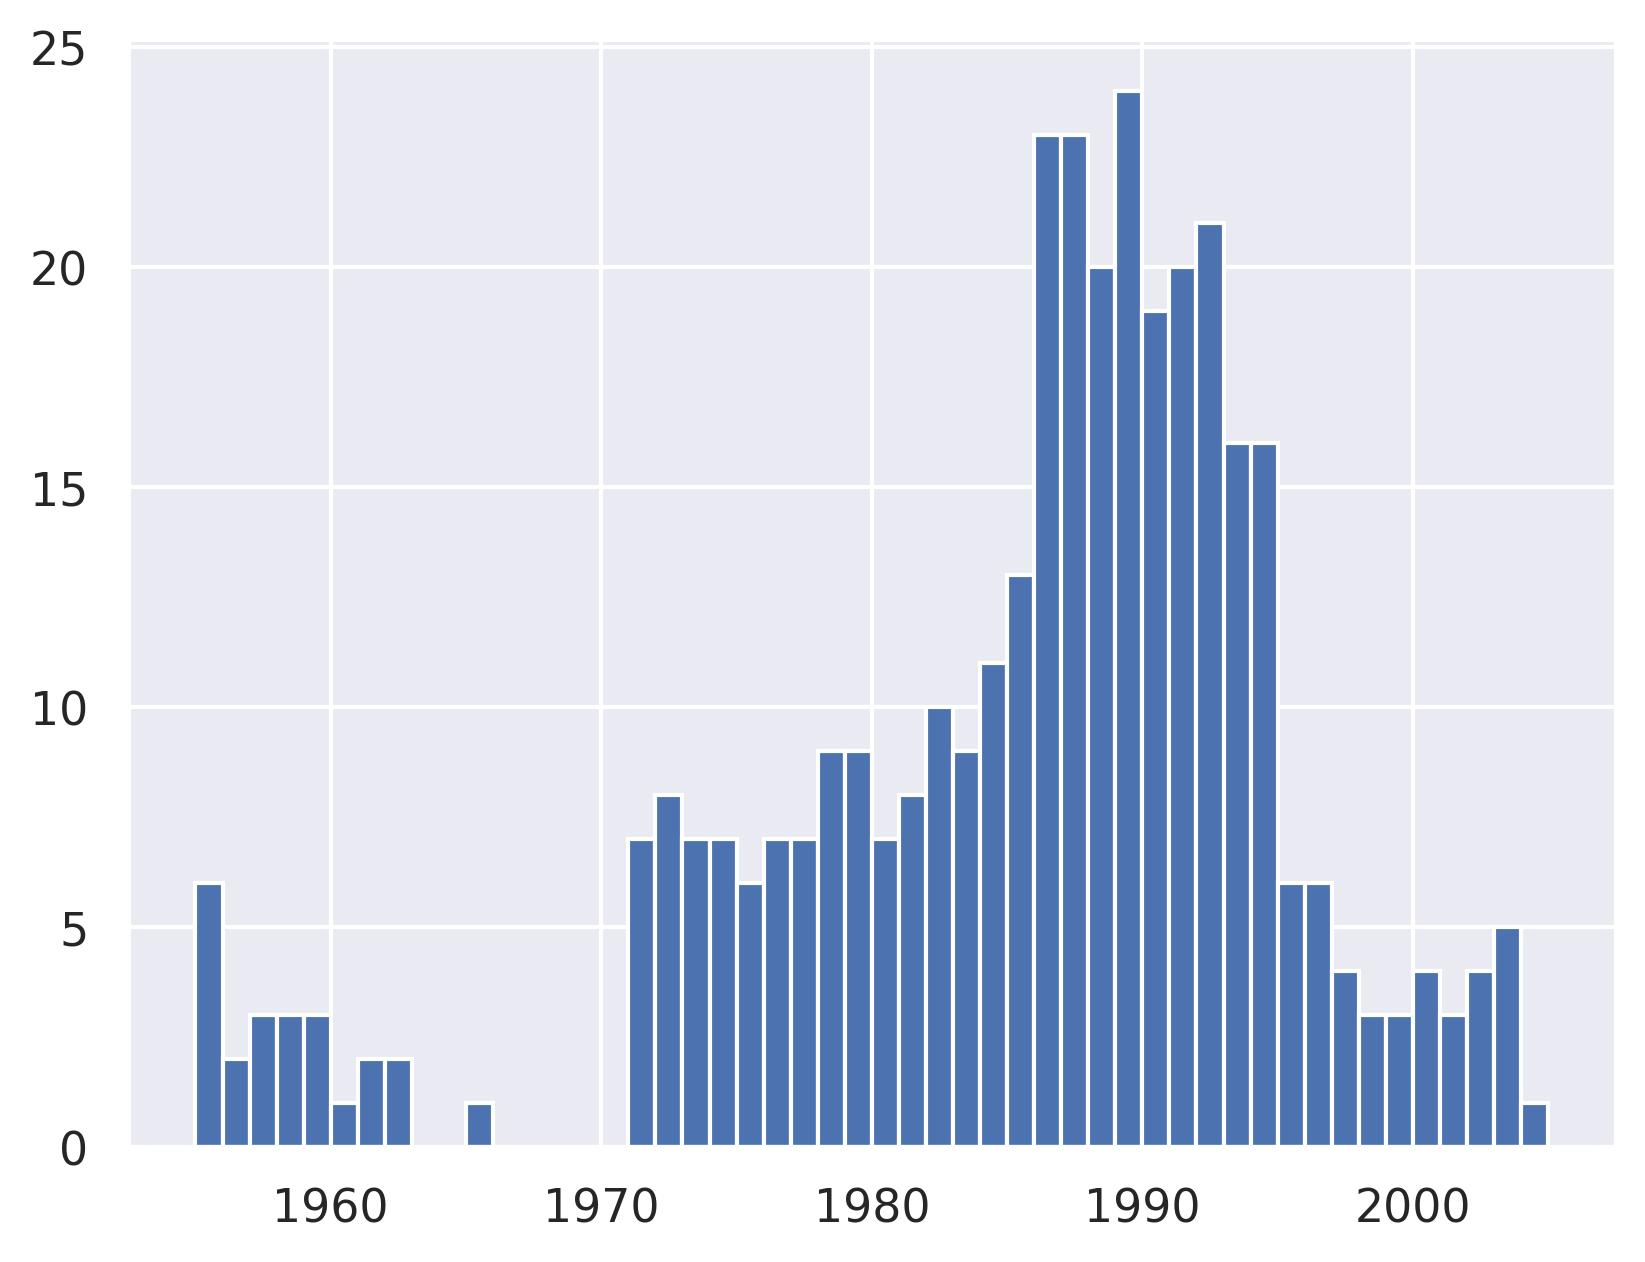

In [36]:
plt.figure(dpi=300)
bin_sizes, _, _ = plt.hist(df.year[nan], bins=range(1955, 2006))

From this histogram plot we can see the distribution of errors. There are at most 24, so it shouldn't be too harmful to remove these data points.

In [37]:
df = df.loc[~nan]
df.profit = df.profit.apply(pd.to_numeric)

This line removes the rows with missing values.

In [38]:
len(df)

25131

Thus we have confirmed that we have lost the annoying values.

In [39]:
25500 - 369

25131

We have exactly the number of values we would expect to have.

In [40]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

`profit` is now a `float64` value, as we would expect.

### Plotting with `matplotlib`

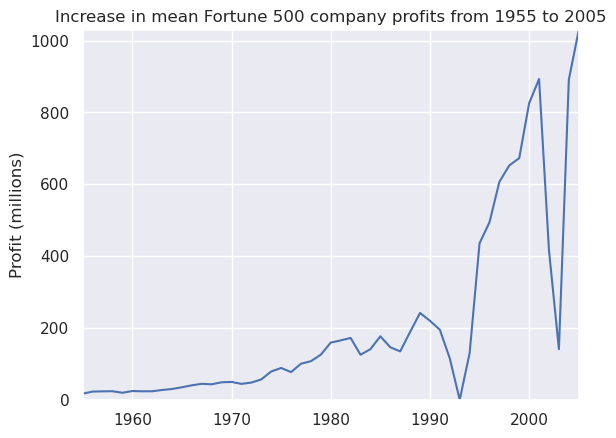

In [46]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index.to_numpy()
y1 = avgs.profit.to_numpy()
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

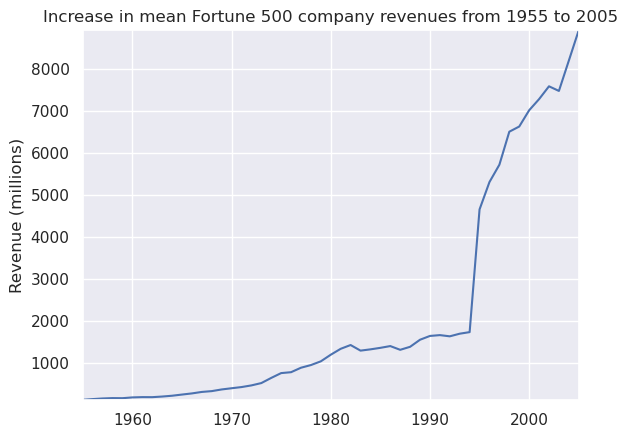

In [42]:
y2 = avgs.revenue.to_numpy()
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

We can see from this that revenues were not as badly hit as profits during the financial crsahes. This may explain why the overall trend is exponential, with the profits recovering to where they might have otherwise been, instead of resuming growth from the lower point.

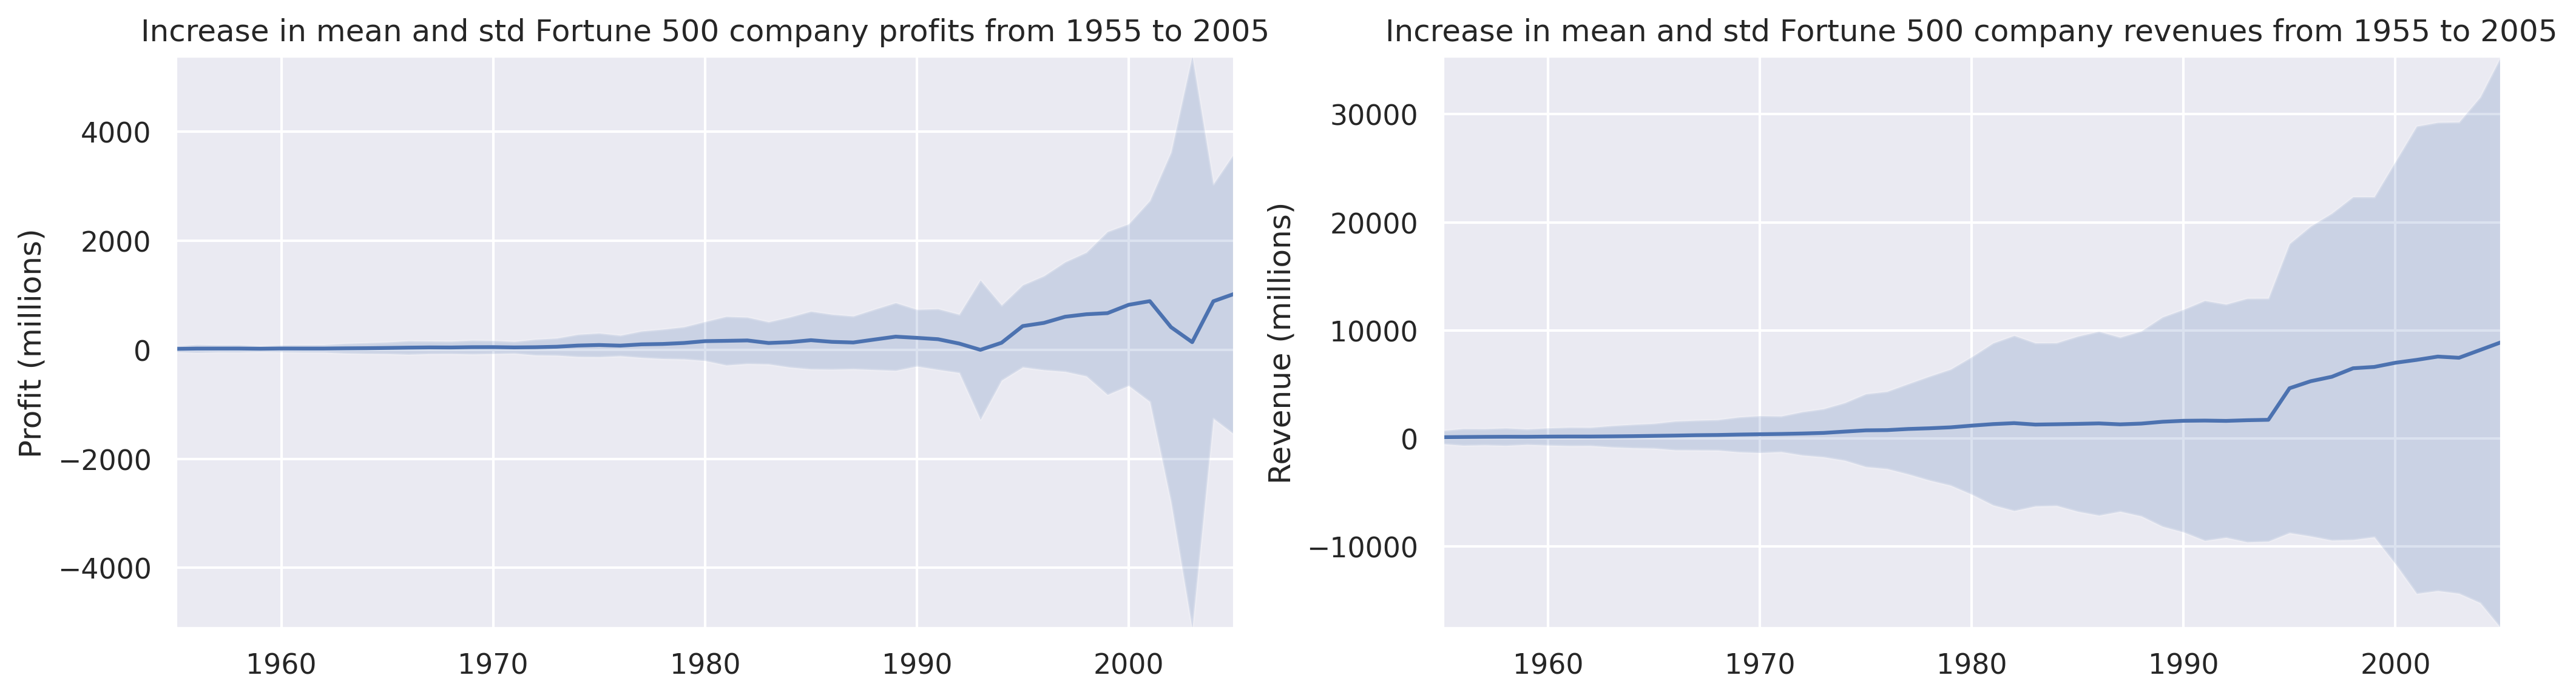

In [48]:
# plotting standard deviations
def plotWithStd(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4), dpi=300)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.to_numpy()
stds2 = group_by_year.std().revenue.to_numpy()
plotWithStd(x, y1, stds1, ax1, title % 'profits', 'Profit (millions)')
plotWithStd(x, y2, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.tight_layout()

This shows the enormous standard deviations from the mean, as some companies grew massively and others lost a lot of money.

> End of tutorial.